In [36]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

import time

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

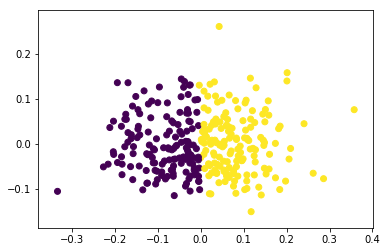

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [4]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200
)

minibatchkmeans.fit(X_pca)

predict_mini = minibatchkmeans.predict(X_pca)

print(pd.crosstab(predict_mini, y_pred))

col_0    0    1
row_0          
0       15  154
1      134    0


In [5]:
pd.crosstab(predict_mini, y)

col_0,0,1
row_0,,
0,59,110
1,80,54


In [38]:
start = time.process_time()
kmeans_1 = KMeans(n_clusters=2, random_state=42)

kmeans_1.fit(X_pca)

kmeans_1_pred = kmeans_1.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(kmeans_1_pred, y)

0.04110800000000836


col_0,0,1
row_0,,
0,84,65
1,55,99


In [37]:
start = time.process_time()
minik_1 = MiniBatchKMeans(n_clusters=2,batch_size=200, init='random')

minik_1.fit(X_pca)

minik_1_pred = minik_1.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_1_pred, y)

0.015288999999995667


col_0,0,1
row_0,,
0,56,100
1,83,64


In [40]:
start = time.process_time()
kmeans_2 = KMeans(n_clusters=3, random_state=42)

kmeans_2.fit(X_pca)

kmeans_2_pred = kmeans_2.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(kmeans_2_pred, y)

0.05662199999997597


col_0,0,1
row_0,,
0,65,70
1,25,61
2,49,33


In [43]:
start = time.process_time()
minik_2 = MiniBatchKMeans(n_clusters=3,batch_size=200, init='random')

minik_2.fit(X_pca)

minik_2_pred = minik_2.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_2_pred, y)

0.02166800000000535


col_0,0,1
row_0,,
0,49,29
1,24,55
2,66,80


In [42]:
start = time.process_time()
kmeans_3 = KMeans(n_clusters=4, random_state=421)

kmeans_3.fit(X_pca)

kmeans_3_pred = kmeans_3.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(kmeans_3_pred, y)

0.08260199999998008


col_0,0,1
row_0,,
0,39,22
1,37,67
2,21,50
3,42,25


In [48]:
start = time.process_time()
minik_3 = MiniBatchKMeans(n_clusters=4,batch_size=200, init='random')

minik_3.fit(X_pca)

minik_3_pred = minik_3.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_3_pred, y)

0.030341000000021268


col_0,0,1
row_0,,
0,17,31
1,39,80
2,34,17
3,49,36


In [46]:
start = time.process_time()
kmeans_4 = KMeans(n_clusters=5, random_state=421)

kmeans_4.fit(X_pca)

kmeans_4_pred = kmeans_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(kmeans_4_pred, y)

0.0624559999999974


col_0,0,1
row_0,,
0,34,45
1,16,22
2,36,12
3,40,28
4,13,57


In [49]:
start = time.process_time()
minik_4 = MiniBatchKMeans(n_clusters=5,batch_size=200, init='random')

minik_4.fit(X_pca)

minik_4_pred = minik_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_4_pred, y)

0.034176000000002205


col_0,0,1
row_0,,
0,33,19
1,16,51
2,39,20
3,14,41
4,37,33


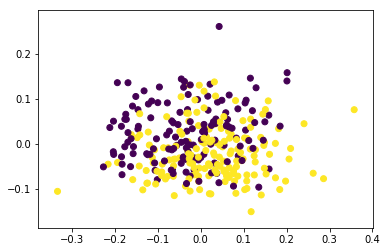

In [61]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

plt.show()

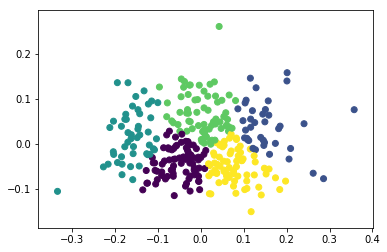

In [62]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_4_pred)

plt.show()

In [98]:
start = time.process_time()
minik_4 = MiniBatchKMeans(random_state=4, 
                          n_clusters=5,batch_size=200, init='random')

minik_4.fit(X_pca)

minik_4_pred = minik_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_4_pred, y)

0.023337999999995418


col_0,0,1
row_0,,
0,37,20
1,21,28
2,29,8
3,32,52
4,20,56


In [103]:
start = time.process_time()
minik_4 = MiniBatchKMeans(random_state=4567, 
                          n_clusters=5,batch_size=200,
                          init='k-means++')

minik_4.fit(X_pca)

minik_4_pred = minik_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_4_pred, y)

0.029592000000008056


col_0,0,1
row_0,,
0,30,23
1,29,13
2,11,48
3,36,59
4,33,21


In [104]:
start = time.process_time()
minik_4 = MiniBatchKMeans(random_state=456, 
                          n_clusters=5,batch_size=200,
                          init='k-means++')

minik_4.fit(X_pca)

minik_4_pred = minik_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_4_pred, y)

0.03401900000000069


col_0,0,1
row_0,,
0,17,68
1,31,14
2,29,16
3,34,50
4,28,16


In [105]:
start = time.process_time()
minik_4 = MiniBatchKMeans(random_state=45, 
                          n_clusters=5,batch_size=200,
                          init='k-means++')

minik_4.fit(X_pca)

minik_4_pred = minik_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(minik_4_pred, y)

0.054563000000001693


col_0,0,1
row_0,,
0,40,47
1,14,23
2,37,19
3,14,55
4,34,20


In [106]:
start = time.process_time()
kmeans_4 = KMeans(n_clusters=5, random_state=45, init='k-means++')

kmeans_4.fit(X_pca)

kmeans_4_pred = kmeans_4.predict(X_pca)

print(time.process_time() - start)
pd.crosstab(kmeans_4_pred, y)

0.06435499999997774


col_0,0,1
row_0,,
0,15,30
1,40,23
2,33,44
3,36,12
4,15,55
